# Params

In [1]:
#pip install astropy


     |████████████████████████████████| 9.6 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 742 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 12.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

     |████████████████████████████████| 10.3 MB 42 kB/s  eta 0:00:01
     |████████████████████████████████| 3.0 MB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 11.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy

     |████████████████████████████████| 27.3 MB 12.5 MB/s eta 0:00:01   |█▉                              | 1.5 MB 3.2 MB/s eta 0:00:09
Note: you may need to restart the kernel to use updated packages.


In [45]:
pip uninstall cupy

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install opencv-python

     |████████████████████████████████| 51.0 MB 12.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


**Imports**

In [49]:
#Download 
    #astropy
    #scipy
    #matplotlib
    #google 
    #google colab

# Simulated Images
from matplotlib import pyplot as plt
import numpy as np ## CPU
#import cupy as cp ##GPU
import random
from astropy.io import fits
from astropy.utils.data import download_file
import os
import cv2
#Convolution 
from scipy import ndimage
#Drive 


#from google.colab import drive
#drive.mount('/content/drive')

**Params Images**

In [86]:
N = 28 # image size
N_PSF = 28 # psf size
TYPE_PSF = 'gauss_28x28' 

**Params Elipses**

In [51]:
MIN_VALUE_INTENSITY = 0.6 #TExampleODO: comentar
MAX_VALUE_INTENSITY = 0.99  #TODO: comentar

MIN_A = N*0.05  #5% of image width     #minimum value of the semi-minor axis (a)
MAX_A = N*0.15  #15%  of image width   #maximum value of the semi-minor axis (a)
STEP_A =  0.01  #step between the maximum and minimum value range of (a)


MIN_B = N*0.05  #5% of image length    #minimum value of the semi-major axis (b)
MAX_B = N*0.15  #15% of image length   #maximum value of the semi-major axis (b)
STEP_B = 0.01   #step between the maximum and minimum value range of (b)

MOV_X = N*0.1 #(+/-10%)   #maximum movement in the x-axis (positive and negative) with respect to the center of the image
STEP_X = 1 #step between the maximum and minimum value range of the movement in the x-axis


MOV_Y = N*0.1 #(+/-10%)   #maximum movement in the y-axis (positive and negative) with respect to the center of the image
STEP_Y = 1 #step between the maximum and minimum value range of the movement in the y-axis

ANGLE_MIN = -np.pi #TODO:comentar
ANGLE_MAX=   np.pi #TODO:comentar
STEP_ANGLE = 0.1 #TODO:comentar

SIGMA_MIN = 0  #TODO:comentar
SIGMA_MAX = 1#TODO:comentar
STEP_SIGMA  = 0.1 #TODO:comentar

**Params Simulated Image**

In [52]:
N_ELLIPSES_RANDOM = 100 #Number of ellipses created randomly
N_ELLIPSES_OPERATION = round(N_ELLIPSES_RANDOM*0.1) #10% of the list  of ellipses #Number of ellipses to operate to create a simulated image
PERC_INFO = 0.04  # 4% #percentage of information in an image, so that it is considered valid

**Params Dataset Save**

In [87]:
PATH_IMAGE_SAVE = 'dataset/images_'+str(N)+'x'+str(N) #path where the dataset images is saved
PATH_CONVOLUTION_SAVE = 'dataset/images_'+str(N)+'x'+str(N)+'_'+TYPE_PSF+'/convolution' #path where the dataset convolution is saved
PATH_PSF_SAVE = 'dataset/images_'+str(N)+'x'+str(N)+'_'+TYPE_PSF+'/psf' #path where the dataset convolution is saved
INITIAL_SAVE = 0 #initial index for the names of the generated images 
FINAL_SAVE = 10000 #final index for the names of the generated images 

**Auxiliary functions**

Function which makes a directory `path`.

In [54]:
def make_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

display fit image from a directory

In [11]:
def display_fits(path):
  hdul=fits.open(path)
  hdr = hdul[0].header
  size = hdr[3]
  data = hdul[0].data.astype(np.float32)
  image = np.reshape(data,[size,size])
  plt.imshow(image)

read fit image dataset from a directory


*   `path`: path where the images are
*   `type_image`: *image* (simulated images) or *conv* (dirty images)
*   `size_image`: TODO: comentar
*   `initial`: initial index for the names of the saved images
*   `final`: final index for the names of the saved images


In [12]:
def get_dataset(path,type_image,size_image,initial,final):
  images = []
  for i in range(initial,final):
    path_file = path+'/'+type_image+'_'+str(size_image)+'x'+str(size_image)+'_'+str(i)+'.fits'
    hdul=fits.open(path_file)
    data = hdul[0].data.astype(np.float32)
    image = np.reshape(data,[size_image,size_image])
    images.append(image)
    #print(i)
  return images

# Simuted Images



**Create Ellipse**


* `n`: image size
* `a`: exe semi-minor axis
* `b`: semi-major axis
* `min`: TODO: Comentar
* `max`: TODO: Comentar
* `mov_x`: movement in the x-axis with respect to the center of the image
* `mov_y`: movement in the y-axis with respect to the center of the image
* `angle`: angle around
* `sigma`: TODO: Comentar



 






In [13]:
def create_elipse(n,a,b,min,max,mov_x,mov_y,angle,sigma):
  X=np.reshape(np.arange(0,n),(1,n))
  Y=np.reshape(np.arange(0,n), (n,1)) 
  X=X-n/2 + mov_x
  Y=Y-n/2 + mov_y
  c=np.cos(angle)
  s=np.sin(angle)
  XX=X*c + Y*s # para no sobre-escribir X
  YY=X*s - Y*c
  X=XX
  Y=YY
  Z=np.sqrt(((X/a)**2+((Y/b)**2)))
  Z= np.exp(-Z**2/2/sigma**2)
  ZZ =np.copy(Z)
  Z[ZZ<min]=0
  Z[ZZ>max]=0
  return Z

Example

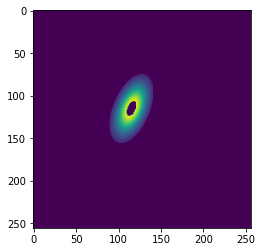

In [14]:
n = 256 # image 256x256
a = 20 # eje semi-minor
b = 40 # eje semi-major
min= 0.1  # TODO: comentar
max = 0.9 # TODO: comentar
mov_x = n*0.05 #5% to the right of the center of the image
mov_y = n*0.05 #5% up from the center of the image 
angle = 2*np.pi*(1/16.0) # (45º angle around)
sigma = 0.5 # TODO: comentar

elipse = create_elipse(n,a,b,min,max,mov_x,mov_y,angle,sigma)
plt.imshow(elipse)

**Random Ellipses**

For each of the ellipse parameters we generate a list of all the values ​​that they can take.

*   `a_list`: list of all possible values ​​that of semi-minor axis `a`
*   `b_list`: list of all possible values of semi-major axis  `b` 
*   `mov_x_list`: TODO: Esto no es asi lista de desplazamientos con respecto al centro de la elipse en el plano x 
*   `mov_y_list`:   TODO: Esto no es asi  lista de desplazamientos con respecto al centro de la elipse en el plano y 
*   `angle_list`:   TODO: comentar
*   `sigma_list`:  TODO: comentar






In [15]:
a_list = np.arange(MIN_A,MAX_A,STEP_A)
b_list = np.arange(MIN_B,MAX_B,STEP_B)
mov_x_list = np.arange(-MOV_X,MOV_X,STEP_X)
mov_y_list = np.arange(-MOV_Y,MOV_Y,STEP_Y)
angle_list=  np.arange(ANGLE_MIN,ANGLE_MAX,STEP_ANGLE)
sigma_list = np.arange(SIGMA_MIN,SIGMA_MAX,STEP_ANGLE)


now, we generate a random value of each parameter of an ellipse



In [16]:
def random_params(a_list,b_list,mov_x_list,mav_y_list,angle_list,sigma_list):
  a  = random.choice(a_list)
  b  = random.choice(b_list)
  x = random.choice(mov_y_list)
  y = random.choice(mov_y_list)
  an = random.choice(angle_list) 
  sig = random.choice(sigma_list)
  return [a,b,x,y,an,sig]

Example

<Figure size 432x288 with 0 Axes>

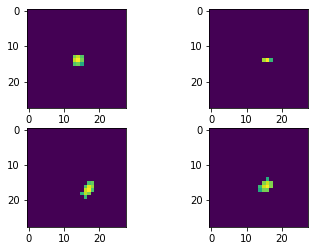

In [17]:
params_1 = random_params(a_list,b_list,mov_x_list,mov_y_list,angle_list,sigma_list)
params_2 = random_params(a_list,b_list,mov_x_list,mov_y_list,angle_list,sigma_list)
params_3 = random_params(a_list,b_list,mov_x_list,mov_y_list,angle_list,sigma_list)
params_4 = random_params(a_list,b_list,mov_x_list,mov_y_list,angle_list,sigma_list)

ellipse_1 = create_elipse(N,params_1[0],params_1[1],MIN_VALUE_INTENSITY,MAX_VALUE_INTENSITY,params_1[2],params_1[3],params_1[4],params_1[5])
ellipse_2 = create_elipse(N,params_2[0],params_2[1],MIN_VALUE_INTENSITY,MAX_VALUE_INTENSITY,params_2[2],params_2[3],params_2[4],params_2[5])
ellipse_3 = create_elipse(N,params_3[0],params_3[1],MIN_VALUE_INTENSITY,MAX_VALUE_INTENSITY,params_3[2],params_3[3],params_3[4],params_3[5])
ellipse_4 = create_elipse(N,params_4[0],params_4[1],MIN_VALUE_INTENSITY,MAX_VALUE_INTENSITY,params_4[2],params_4[3],params_4[4],params_4[5])

plt.figure()
f, axarr=plt.subplots(2,2)
axarr[0,0].imshow(ellipse_1)
axarr[0,1].imshow(ellipse_2)
axarr[1,0].imshow(ellipse_3)
axarr[1,1].imshow(ellipse_4)


**List of random Ellipses**



We generate a list of random ellipses, of size `N_RANDOM_ELIPSES`




In [18]:
def create_ellipses(n_ellipses,a_list,b_list,mov_x_list,mov_y_list,angle_list,sigma_list):
  elipses = []
  for i in range(0,n_ellipses):
    params = random_params(a_list,b_list,mov_x_list,mov_y_list,angle_list,sigma_list)
    elipse= create_elipse(N,params[0],params[1],MIN_VALUE_INTENSITY,MAX_VALUE_INTENSITY,params[2],params[3],params[4],params[5])
    elipses.append(elipse)
  return elipses
  
list_elipses = create_ellipses(N_ELLIPSES_RANDOM,a_list,b_list,mov_x_list,mov_y_list,angle_list,sigma_list)

<ipython-input-13-9d504985cb07>:13: RuntimeWarning: divide by zero encountered in true_divide
  Z= np.exp(-Z**2/2/sigma**2)


now we visualize 4 images of the generated ellipse list

<Figure size 432x288 with 0 Axes>

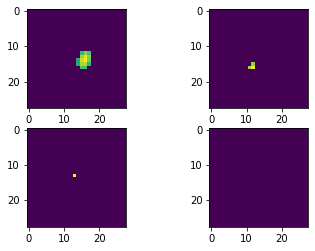

In [19]:
list_random_elipses = random.sample(list_elipses, 4)
plt.figure()
f, axarr=plt.subplots(2,2)
axarr[0,0].imshow(list_random_elipses[0])
axarr[0,1].imshow(list_random_elipses[1])
axarr[1,0].imshow(list_random_elipses[2])
axarr[1,1].imshow(list_random_elipses[3])


**Image information percentage**

Finally, to simulate the interferometric image, we will make a combination of ellipses through mathematical operations.

To avoid that the generated image is empty or contains very little information, we created a function that allows us to calculate the percentage of information

In [20]:
def get_perc_info(image):
   n = len(image)
   c = np.sum(image>0)  
   perc=(c)/(n*n)
   return perc

we also create a function to normalize the created image

In [21]:
def normalize(image):
  image = image - np.min(image)
  image = image/np.max(image)
  return image



*   `list_elipses`: list containing all possible ellipses to combine
*   `size_subsets`: number of ellipses to combine

Using these parameters we generate a random subset of `list_elipses` called` list_random_elipses`. We obtain the first element of this subset and perform a mathematical operation (obtained randomly from the list of `operators`) with the next ellipse in the list, then the generated figure is operated with the next element in the list of subsets.


In [22]:
def random_figure(list_elipses,size_subset):
  size = len(list_elipses)
  if (size_subset > size):
    size_subset = size
  operators = ['*','+','-']
  list_random_elipses = random.sample(list_elipses, size_subset)
  final_figure = list_random_elipses[random.randrange(0,size_subset-1,1)]
  for elipse in list_random_elipses:
    operator =random.choice(operators)
    if (operator == '+'):
      final_figure = elipse + final_figure
    elif (operator == '*'):
      final_figure = elipse * final_figure
    elif (operator == '-'):
      final_figure = elipse - final_figure
  final_figure_copy  = np.copy(final_figure)
  final_figure = normalize(final_figure)
  final_figure[final_figure_copy ==0]=0
  if (get_perc_info(final_figure) > PERC_INFO):
    #ZZ =np.copy(final_figure)
    #final_figure[ZZ<MIN_VALUE_INTENSITY]=0
    #final_figure[ZZ>MAX_VALUE_INTENSITY]=0
    return final_figure
  else:
    return random_figure(list_elipses,size)

Example

<ipython-input-21-dc5f07edffcd>:3: RuntimeWarning: invalid value encountered in true_divide
  image = image/np.max(image)


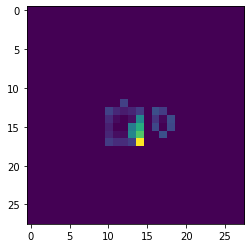

In [23]:
figure = random_figure(list_elipses,N_ELLIPSES_OPERATION)
plt.imshow(figure)

**CREATE AND SAVE DATASET SIMULATED IMAGES IN FITS FORMAT**

*   `initial`: initial index for the names of the generated images
*   `final`: final index for the names of the generated images
*   `list_elipses`: list of ellipses
*   `path`: path where the images are saved



In [24]:
def dataset_figures(initial,final,list_elipses,path):
  dataset = []
  size_ellipse = len(list_elipses[0])
  for index in range(initial,final):
    figure = random_figure(list_elipses,N_ELLIPSES_OPERATION)
    hdu_image =fits.PrimaryHDU(figure)
    hdu_image.writeto(path+'/image_'+str(size_ellipse)+'x'+str(size_ellipse)+'_'+str(index)+'.fits',clobber=True)
    dataset.append(figure)
  return dataset

Example

<ipython-input-21-dc5f07edffcd>:3: RuntimeWarning: invalid value encountered in true_divide
  image = image/np.max(image)


<Figure size 432x288 with 0 Axes>

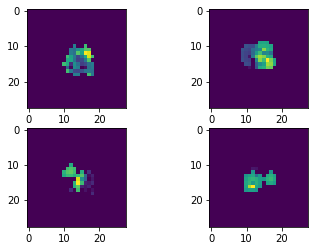

In [25]:
make_dir(PATH_IMAGE_SAVE)
simulted_images = dataset_figures(INITIAL_SAVE,FINAL_SAVE,list_elipses,PATH_IMAGE_SAVE)
list_random_dataset = random.sample(simulted_images, 4)
plt.figure()
f, axarr=plt.subplots(2,2) 
axarr[0,0].imshow(list_random_dataset[0])
axarr[0,1].imshow(list_random_dataset[1])
axarr[1,0].imshow(list_random_dataset[2])
axarr[1,1].imshow(list_random_dataset[3])


In [27]:
print("finalized")

finalized


# Read Simuted Images

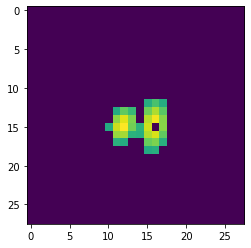

In [88]:
simulted_images = get_dataset(PATH_IMAGE_SAVE,'image',N,INITIAL_SAVE,FINAL_SAVE)
simulated_image_random  = random.choice(simulted_images)
plt.imshow(simulated_image_random)

In [89]:
print("finalized")

finalized


# PSF 

In [57]:
def info_fit_path(path):
   image_link = download_file(path, cache=True )
   hdu_list = fits.open(image_link)
   hdu_list.info()

In [58]:
def getdata_fit_path(path):
  image_link = download_file(path, cache=True )
  image = fits.getdata(image_link).astype(np.float32)
  image = np.reshape(image,[image.shape[2],image.shape[3]])
  return image

**PSF real 128x128**

Filename: /home/nicolas/.astropy/cache/download/url/423d062de61cc8a03c5869b3ab47e189/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      77   (128, 128, 1, 1)   float32   


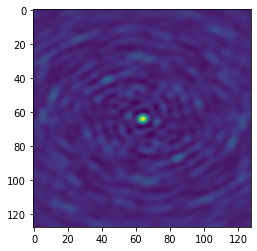

In [59]:
url_128x128 = 'https://github.com/nicolasalarconl/InterferometryDeepLearning/blob/main/4_hd142_128x128_08.psf.fits?raw=true'
psf_128x128 = getdata_fit_path(url_128x128)
plt.imshow(psf_128x128)
info_fit_path(url_128x128)

**PSF real 28x28**

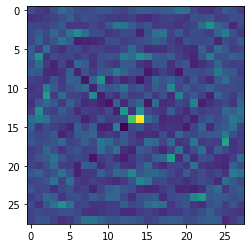

In [60]:
url_128x128 = 'https://github.com/nicolasalarconl/InterferometryDeepLearning/blob/main/4_hd142_128x128_08.psf.fits?raw=true'
psf_128x128 = getdata_fit_path(url_128x128)
psf_28x28 = cv2.resize(psf_128x128, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
plt.imshow(psf_28x28)

**PSF real 64x64**

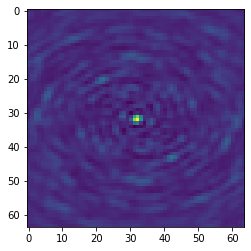

In [61]:
url_128x128 = 'https://github.com/nicolasalarconl/InterferometryDeepLearning/blob/main/4_hd142_128x128_08.psf.fits?raw=true'
psf_128x128 = getdata_fit_path(url_128x128)
psf_64x64 = cv2.resize(psf_128x128, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
plt.imshow(psf_64x64)

**PSF Gaussian**

In [62]:
def gauss(tamX,tamY,div):
  x, y = np.meshgrid(np.linspace(-1,1,tamX), np.linspace(-1,1,tamY))
  d = np.sqrt(x*x+y*y)
  sigma, mu = 1/div, 0.0
  gauss = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
  return gauss


Example PSF Gauss 128x128

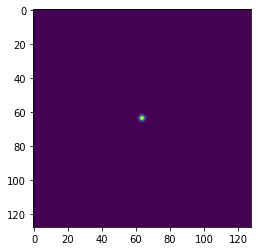

In [63]:
psf_gauss_128x128 =gauss(128,128,64)
plt.imshow(psf_gauss_128x128)

Example PSF Gauss 64x64

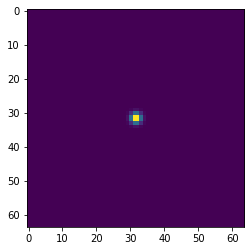

In [64]:
psf_gauss_64x64 =gauss(64,64,32)
plt.imshow(psf_gauss_64x64)

Example PSF Gauss 28x28

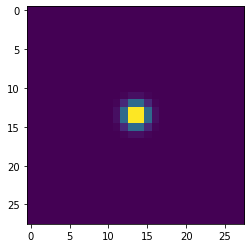

In [65]:
psf_gauss_28x28 =gauss(28,28,14)
plt.imshow(psf_gauss_28x28)

# Dirty Images

**Params**

In [91]:
DATASET_SIMULTED_IMAGES = get_dataset(PATH_IMAGE_SAVE,'image',N,INITIAL_SAVE,FINAL_SAVE)
#DATASET_SIMULTED_IMAGES = simulted_images
PSF = psf_gauss_28x28

**Auxiliary functions**

In [92]:
### display two images
def display_two(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

# Display one image
def display(a, title1 = "Original"):
    plt.imshow (a), plt.title(title1)
    plt.show()

**Convolution: PSF 128x128 cell 0.8 - Simulated Image**


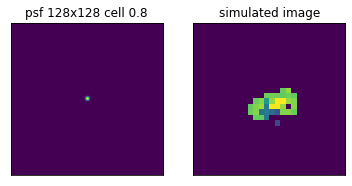

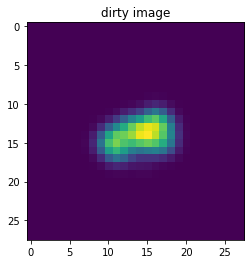

In [70]:
simulated_image_random  = random.choice(simulted_images)
display_two(psf_gauss_128x128,simulated_image_random,title1="psf 128x128 cell 0.8",title2="simulated image")
conv_128x128_08 = ndimage.convolve(simulated_image_random,psf_gauss_128x128,mode='constant', cval=0.0)
display(conv_128x128_08,"dirty image")

**Convolution: PSF 128x128 - 3 Random Simulated Image**

<Figure size 432x288 with 0 Axes>

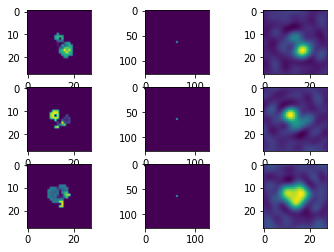

In [71]:
simulated_images_random =  random.sample(simulted_images, 3)
random_1_conv_128x128 = ndimage.convolve(simulated_images_random[0],psf_128x128,mode='constant', cval=0.0)
random_2_conv_128x128 = ndimage.convolve(simulated_images_random[1],psf_128x128,mode='constant', cval=0.0)
random_3_conv_128x128 = ndimage.convolve(simulated_images_random[2],psf_128x128,mode='constant', cval=0.0)

plt.figure()
f, axarr=plt.subplots(3,3)
axarr[0,0].imshow(simulated_images_random[0])
axarr[0,1].imshow(psf_gauss_128x128)
axarr[0,2].imshow(random_1_conv_128x128)
axarr[1,0].imshow(simulated_images_random[1])
axarr[1,1].imshow(psf_gauss_128x128)
axarr[1,2].imshow(random_2_conv_128x128)
axarr[2,0].imshow(simulated_images_random[2])
axarr[2,1].imshow(psf_gauss_128x128)
axarr[2,2].imshow(random_3_conv_128x128)

**Convolution: PSF Gaus 128x128- Simulated Image**

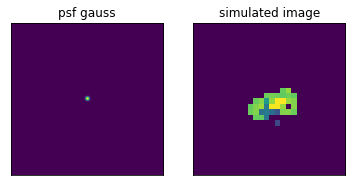

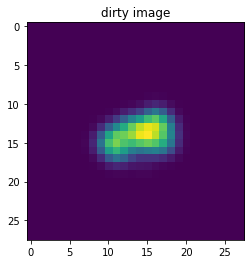

In [72]:
display_two(psf_gauss_128x128,simulated_image_random,title1="psf gauss",title2="simulated image")
conv_gauss = ndimage.convolve(simulated_image_random,psf_gauss_128x128,mode='constant', cval=0.0)
display(conv_gauss,"dirty image")

**Convolution: PSF Gaus 28x28- Simulated Image**

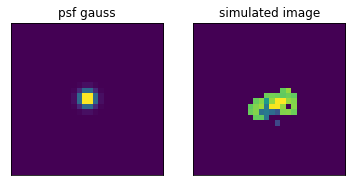

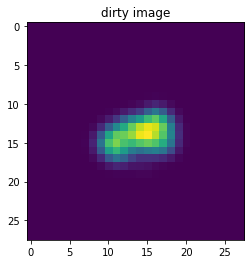

In [73]:
display_two(psf_gauss_28x28,simulated_image_random,title1="psf gauss",title2="simulated image")
conv_gauss = ndimage.convolve(simulated_image_random,psf_gauss_28x28,mode='constant', cval=0.0)
display(conv_gauss,"dirty image")

**CREATE AND SAVE DIRTY IMAGES**



*  `psf`: point spread function to convolve 
*  `psf_name`: label psf
*  `images`: simulated image to convolve
*  `path`: path where convolved images will be saved



In [93]:
def dataset_dirty(psf,images,path):
  dataset = []
  index = 0
  size_psf = len(psf)
  for image in images:
    conv = ndimage.convolve(image,psf,mode='constant', cval=0.0)
    hdu_image =fits.PrimaryHDU(conv)
    hdu_image.writeto(path+'/conv_'+str(size_psf)+'x'+str(size_psf)+'_'+str(index)+'.fits',clobber=True)
    dataset.append(conv)
    index = index + 1
    #print(index) 
  return dataset

In [94]:
def save_psf(psf,type_psf,path):
    size_psf = len(psf)
    hdu_image =fits.PrimaryHDU(psf)
    hdu_image.writeto(path+'/psf_'+type_psf+'.fits',clobber=True)

Example

In [ ]:
make_dir(PATH_CONVOLUTION_SAVE)
make_dir(PATH_PSF_SAVE)
save_psf(PSF,TYPE_PSF,PATH_PSF_SAVE)
dirty_images = dataset_dirty(PSF,DATASET_SIMULTED_IMAGES,PATH_CONVOLUTION_SAVE)
list_random_dirty = random.sample(dirty_images, 4)
plt.figure()
f, axarr=plt.subplots(2,2)
axarr[0,0].imshow(list_random_dirty[0])
axarr[0,1].imshow(list_random_dirty[1])
axarr[1,0].imshow(list_random_dirty[2])
axarr[1,1].imshow(list_random_dirty[3])

In [ ]:
print("finalized")

# Read Dirty Images

In [ ]:
#dirty_images = get_dataset(PATH_CONVOLUTION_SAVE,'conv',N_PSF,INITIAL_SAVE,FINAL_SAVE)
dirty_image_random  = random.choice(dirty_images)
plt.imshow(dirty_image_random)

In [ ]:
print("finalized")